# 3.1 Exploratory Data Analysis for the Edft_balanced dataset

## Notebook Setup: Imports and Configuration

In [1]:
# ─────────────────────────────
# Standard Library Imports
# ─────────────────────────────
import os
import sys
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# ─────────────────────────────
# Adjust sys.path for Local Modules
# ─────────────────────────────
src_dir = os.path.abspath(os.path.join('..', '..', 'src'))
if src_dir not in sys.path:
    sys.path.append(src_dir)

# ─────────────────────────────
# Project-Specific Imports
# ─────────────────────────────
#from plots_details import metal_colors, cavity_colors_sacs
#from utils import *
from vis import * 
from settings import *
# ─────────────────────────────
# Define Paths and Load Data
# ─────────────────────────────

dacs_energies_out_dir = '../../../data/external/dacs_energies_out'

Edft_coh_df = pd.read_csv(os.path.join(dacs_energies_out_dir, 'Edacs_dft.csv'))
Edft_balanced_df = pd.read_csv(os.path.join(dacs_energies_out_dir, 'Edft_balanced_df.csv'))
Edft_coh_iqr_df = pd.read_csv(os.path.join(dacs_energies_out_dir, 'Edacs_dft.csv'))  

In [2]:
Edft_coh_iqr_df.shape

(909, 151)

In [3]:
Edft_balanced_df.shape

(856, 151)

## Export the outliers

In [4]:
# Filter for `system_dacs` that are in Edft_coh_df but not in Edft_coh_iqr_df
unique_system_dacs = Edft_coh_iqr_df[~Edft_coh_iqr_df['system_dacs'].isin(Edft_balanced_df['system_dacs'])]

# Specify the directory and filename for saving
output_path = '../../../data/external/dacs_energies_out/outliers_dacs_balanced_to_iqr.csv'

# Save the filtered data to CSV 
unique_system_dacs.to_csv(output_path, index=False)

## Boxplot Metal Edft_balanced_df

In [5]:
fig = plot_categorical_energy_boxplot(
    df=Edft_balanced_df,
    x_col='M1',
    color_map=metal_colors,
    y_col='E_dft_M1M2',
    hover_col='system_dacs',
    x_title='Metal',
    y_title='E_dft_M1M2 Energy'
)


fig.show()

## Summary statistics metal Edft_balanced_df

In [6]:
metal_summary = Edft_balanced_df.groupby('M1')['E_dft_M1M2'].describe()
print(metal_summary)

    count      mean       std       min       25%       50%       75%  \
M1                                                                      
Ag   62.0 -1.575390  1.211152 -4.606277 -2.319777 -1.674777 -0.666527   
Au   62.0 -2.015912  1.497176 -5.091573 -3.021823 -2.272073 -0.905823   
Cd   56.0 -2.071760  0.959381 -4.379224 -2.624474 -2.049724 -1.357474   
Co   57.0 -3.100720  1.776541 -7.418843 -4.031843 -2.888843 -1.907843   
Cu   64.0 -2.679897  1.377570 -5.917694 -3.565444 -2.843194 -1.888444   
Fe   62.0 -3.177388  1.764462 -7.516565 -4.228315 -2.935065 -1.807315   
Ir   66.0 -2.536229  1.685919 -6.720199 -3.614199 -2.362199 -1.613949   
Ni   65.0 -3.568678  1.692868 -7.615494 -4.585494 -3.541494 -2.586494   
Os   59.0 -1.789566  1.858926 -5.901905 -2.923404 -1.724904 -0.551905   
Pd   64.0 -2.865826  1.350402 -5.993779 -3.695529 -2.961779 -2.099529   
Pt   63.0 -3.370478  1.283521 -6.210764 -4.248764 -3.350764 -2.372264   
Rh   57.0 -2.694689  1.461544 -6.647461 -3.594461 -

## Boxplot Cavity Edft_balanced_df

In [7]:
fig = plot_categorical_energy_boxplot(
    df=Edft_balanced_df,
    x_col='cavity_v2',
    color_map=cavity_colors,
    y_col='E_dft_M1M2',
    hover_col='system_dacs',
    x_title='Cavity',
    y_title='E_dft_M1M2 Energy',
)

fig.show()

## Summary statistics cavity Edft_balanced_df

In [8]:
cavity_summary = Edft_balanced_df.groupby('cavity_3')['E_dft_M1M2'].describe()
print(cavity_summary)

          count      mean       std       min       25%       50%       75%  \
cavity_3                                                                      
0          24.0 -3.314488  2.749222 -7.516565 -5.687799 -3.571925 -0.838938   
1          73.0 -2.098414  2.206942 -7.473565 -3.231038 -1.683038 -0.732573   
2         271.0 -2.142140  1.631448 -7.615494 -3.100977 -2.213224 -1.126471   
3         220.0 -2.581797  1.396097 -6.462494 -3.616844 -2.545250 -1.558748   
4         176.0 -2.975382  1.084242 -6.084494 -3.625464 -2.931190 -2.176915   
5          54.0 -3.291878  1.096419 -5.585494 -4.057316 -3.257211 -2.411280   
6          38.0 -3.867120  1.205340 -6.383494 -4.503129 -3.751766 -3.067536   

               max  
cavity_3            
0         0.811096  
1         2.564095  
2         1.538095  
3         0.897095  
4        -0.476905  
5        -1.120224  
6        -1.616224  


## Count cavity categories

In [9]:
Edft_balanced_df.shape[0]

856

In [10]:
din4_x2_count = Edft_balanced_df['cavity_v2'].str.contains('din4_x2').sum()
print(din4_x2_count)

256


In [11]:
din6_s_count = Edft_balanced_df['cavity_v2'].str.contains('din6_s').sum()
print(din6_s_count)

152


In [12]:
din6_as_count = Edft_balanced_df['cavity_v2'].str.contains('din6_as').sum()
print(din6_as_count)

448


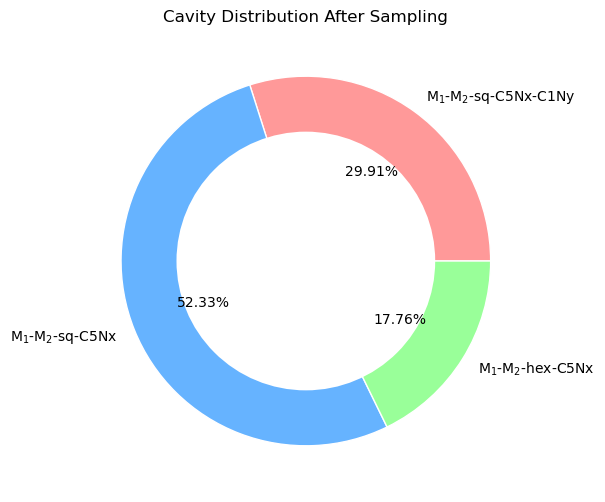

In [13]:
sizes = [29.91, 52.34, 17.76]
labels = ['M$_{1}$-M$_{2}$-sq-C5Nx-C1Ny', 'M$_{1}$-M$_{2}$-sq-C5Nx', 'M$_{1}$-M$_{2}$-hex-C5Nx']
colors = ['#ff9999', '#66b3ff', '#99ff99']

plot_donut_chart(
    sizes=sizes,
    labels=labels,
    colors=colors,
    title='Cavity Distribution After Sampling',
)

## Count number of carbons for each cavity type

This code filters the dataset to include only rows where the `cavity_v2` column contains the substring `'din4_x2'`, `'din6_s'`, and `'din6_as'`. It then groups the filtered data by the `'cavity_3'` category and computes descriptive statistics for the `'E_dft_M1M2'` energy values within each group. 

In [14]:
# Filter the DataFrame based on the condition
filtered_df = Edft_balanced_df[Edft_balanced_df['cavity_v2'].str.contains('din4_x2')]

# Group by 'cavity_3' and describe the 'E_dft_M1M2' column
cavity_summary = filtered_df.groupby('cavity_3')['E_dft_M1M2'].describe().T.round(2)
print(filtered_df.shape)
# Print the summary
print(cavity_summary)

(256, 151)
cavity_3      0      1      2      3      4      5      6
count     13.00  24.00  78.00  46.00  63.00  20.00  12.00
mean      -5.62  -4.19  -3.50  -3.47  -3.84  -4.29  -5.26
std        1.24   2.28   1.64   1.63   0.98   0.75   0.85
min       -7.52  -7.47  -7.62  -6.46  -6.08  -5.59  -6.38
25%       -6.46  -6.05  -4.65  -4.68  -4.45  -5.08  -5.95
50%       -5.64  -4.08  -3.64  -3.58  -3.85  -4.10  -5.30
75%       -5.03  -3.32  -2.23  -2.15  -3.21  -3.89  -4.62
max       -3.35   0.34  -0.20  -0.50  -1.61  -3.12  -4.08


In [15]:
# Filter the DataFrame based on the condition
filtered_df = Edft_balanced_df[Edft_balanced_df['cavity_v2'].str.contains('din6_s')]

# Group by 'cavity_3' and describe the 'E_dft_M1M2' column
cavity_summary = filtered_df.groupby('cavity_3')['E_dft_M1M2'].describe().T.round(2)
print(filtered_df.shape)
# Print the summary
print(cavity_summary)

(152, 151)
cavity_3     1      2      3      4      5      6
count     9.00  47.00  34.00  37.00  12.00  13.00
mean      0.94   0.07  -0.88  -1.99  -2.62  -3.62
std       0.85   0.69   0.63   0.58   0.45   0.52
min      -0.30  -1.37  -2.23  -3.22  -3.39  -4.61
25%       0.57  -0.32  -1.26  -2.33  -2.93  -3.97
50%       0.79   0.01  -0.91  -1.95  -2.61  -3.73
75%       1.55   0.51  -0.55  -1.57  -2.37  -3.21
max       2.56   1.54   0.90  -0.48  -1.82  -2.77


In [16]:
# Filter the DataFrame based on the condition
filtered_df = Edft_balanced_df[Edft_balanced_df['cavity_v2'].str.contains('din6_as')]

# Group by 'cavity_3' and describe the 'E_dft_M1M2' column
cavity_summary = filtered_df.groupby('cavity_3')['E_dft_M1M2'].describe().T.round(2)
print(filtered_df.shape)
# Print the summary
print(cavity_summary)

(448, 151)
cavity_3      0      1       2       3      4      5      6
count     11.00  40.00  146.00  140.00  76.00  22.00  13.00
mean      -0.59  -1.53   -2.13   -2.70  -2.74  -2.75  -2.83
std        0.70   0.79    0.89    1.06   0.79   0.96   0.62
min       -1.59  -3.23   -4.27   -4.59  -4.26  -4.39  -3.78
25%       -0.97  -1.98   -2.71   -3.60  -3.31  -3.63  -3.10
50%       -0.82  -1.62   -2.26   -2.75  -2.83  -2.49  -2.92
75%       -0.06  -0.92   -1.52   -1.99  -2.20  -2.20  -2.39
max        0.81   0.01    0.59    0.08  -0.94  -1.12  -1.62


## Count the number of metals for each cavity type

Filter the DataFrame to include only rows where the 'cavity_v2' column contains `din4_x2`, `din6_s`, and `din6_as`.  Then, group the filtered data by the metal type in column 'M1' and generate descriptive statistics for the 'E_dft_M1M2' energy values. 

In [17]:
# Filter the DataFrame based on the condition
filtered_df = Edft_balanced_df[Edft_balanced_df['cavity_v2'].str.contains('din4_x2')]

# Group by 'cavity_3' and describe the 'E_dft_M1M2' column
cavity_summary = filtered_df.groupby('M1')['E_dft_M1M2'].describe().T.round(2)
print(filtered_df.shape)
# Print the summary
print(cavity_summary)

(256, 151)
M1        Ag     Au     Cd     Co     Cu     Fe     Ir     Ni     Os     Pd  \
count  19.00  20.00  18.00  14.00  20.00  16.00  20.00  18.00  21.00  20.00   
mean   -2.22  -2.89  -2.45  -5.55  -3.34  -5.50  -4.35  -5.47  -3.66  -4.06   
std     1.40   1.57   1.18   0.95   1.58   1.13   1.14   1.10   1.11   0.98   
min    -4.61  -5.09  -4.38  -7.42  -5.92  -7.52  -6.72  -7.62  -5.90  -5.99   
25%    -3.38  -4.07  -3.14  -6.02  -4.27  -5.95  -5.02  -6.31  -4.10  -4.64   
50%    -2.34  -3.20  -2.33  -5.29  -3.49  -5.16  -3.92  -5.35  -3.51  -3.84   
75%    -1.25  -2.01  -1.61  -4.93  -1.85  -4.64  -3.65  -4.87  -2.92  -3.50   
max     0.26   0.34  -0.64  -4.38  -0.20  -4.27  -2.54  -3.10  -2.09  -2.07   

M1        Pt     Rh     Ru     Zn  
count  21.00  13.00  16.00  20.00  
mean   -4.50  -4.54  -3.78  -3.15  
std     1.05   1.08   0.86   1.39  
min    -6.21  -6.65  -6.00  -5.54  
25%    -5.15  -5.06  -4.11  -4.27  
50%    -4.38  -4.08  -3.67  -2.95  
75%    -3.97  -3.86  -3.2

In [18]:
# Filter the DataFrame based on the condition
filtered_df = Edft_balanced_df[Edft_balanced_df['cavity_v2'].str.contains('din6_s')]

# Group by 'cavity_3' and describe the 'E_dft_M1M2' column
cavity_summary = filtered_df.groupby('M1')['E_dft_M1M2'].describe().T.round(2)
print(filtered_df.shape)
# Print the summary
print(cavity_summary)

(152, 151)
M1       Ag     Au    Cd     Co     Cu     Fe     Ir     Ni    Os     Pd  \
count  9.00  12.00  9.00  12.00  13.00  12.00  12.00  12.00  9.00  12.00   
mean  -0.53  -0.49 -1.72  -1.14  -1.24  -1.35  -0.76  -1.34  0.36  -1.41   
std    1.40   1.31  1.07   1.22   1.20   1.17   1.57   1.26  1.66   1.36   
min   -3.06  -2.35 -3.21  -3.67  -3.29  -3.99  -3.81  -3.84 -2.77  -4.10   
25%   -1.72  -1.41 -2.42  -1.65  -2.11  -1.62  -1.96  -2.35 -0.48  -2.19   
50%   -0.20  -0.69 -2.25  -1.18  -1.05  -1.13  -0.37  -1.15  0.90  -1.13   
75%    0.76   0.47 -1.10  -0.26  -0.25  -0.50   0.57  -0.46  1.45  -0.22   
max    0.98   1.56  0.13   0.61   0.79   0.10   1.09   0.57  2.56   0.20   

M1       Pt     Rh     Ru     Zn  
count  7.00  11.00  12.00  10.00  
mean  -2.40  -1.22  -0.62  -2.16  
std    1.28   1.40   1.39   1.13  
min   -4.61  -3.97  -3.06  -3.73  
25%   -3.12  -2.22  -1.76  -3.16  
50%   -1.82  -0.85  -0.44  -2.07  
75%   -1.61   0.02   0.43  -1.37  
max   -0.93   0.22   1.5

In [19]:
# Filter the DataFrame based on the condition
filtered_df = Edft_balanced_df[Edft_balanced_df['cavity_v2'].str.contains('din6_as')]

# Group by 'cavity_3' and describe the 'E_dft_M1M2' column
cavity_summary = filtered_df.groupby('M1')['E_dft_M1M2'].describe().T.round(2)
print(filtered_df.shape)
# Print the summary
print(cavity_summary)

(448, 151)
M1        Ag     Au     Cd     Co     Cu     Fe     Ir     Ni     Os     Pd  \
count  34.00  30.00  29.00  31.00  31.00  34.00  34.00  35.00  29.00  32.00   
mean   -1.49  -2.04  -1.95  -2.75  -2.86  -2.73  -2.10  -3.36  -1.10  -2.67   
std     0.78   0.97   0.70   0.70   0.77   0.82   0.82   0.76   0.95   0.82   
min    -2.79  -3.58  -3.10  -4.03  -3.98  -4.11  -3.61  -4.59  -2.72  -4.05   
25%    -2.09  -2.86  -2.42  -3.20  -3.44  -3.33  -2.73  -3.98  -1.72  -3.23   
50%    -1.52  -2.30  -1.99  -2.82  -2.97  -2.71  -1.94  -3.37  -1.14  -2.62   
75%    -0.91  -1.22  -1.39  -2.28  -2.30  -2.21  -1.61  -2.80  -0.35  -2.22   
max     0.03  -0.04  -0.60  -1.56  -1.03  -1.28  -0.38  -1.88   0.81  -0.91   

M1        Pt     Rh     Ru     Zn  
count  35.00  33.00  33.00  28.00  
mean   -2.88  -2.46  -1.54  -3.14  
std     0.92   0.71   0.75   0.93  
min    -4.41  -3.85  -3.01  -4.48  
25%    -3.64  -2.91  -1.99  -3.79  
50%    -2.78  -2.40  -1.58  -3.32  
75%    -2.28  -1.98  -0.9

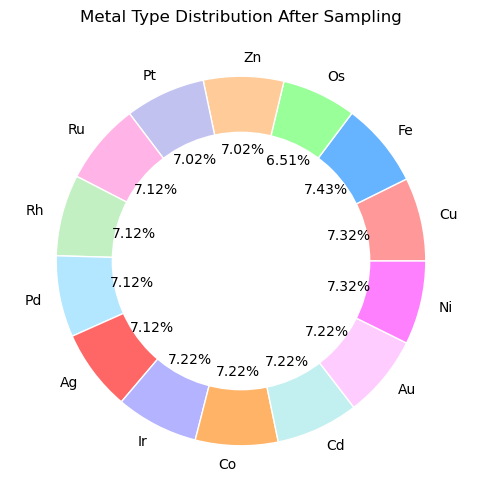

In [20]:
sizes = [7.32, 7.43, 6.51, 7.02, 7.02, 7.12, 7.12, 7.12, 7.12, 7.22, 7.22, 7.22, 7.22, 7.32]
labels = ['Cu', 'Fe', 'Os', 'Zn', 'Pt', 'Ru', 'Rh', 'Pd', 'Ag', 'Ir', 'Co', 'Cd', 'Au', 'Ni']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#b3e6ff',
          '#ff6666', '#b3b3ff', '#ffb366', '#c2f0f0', '#ffccff', '#ff80ff']

plot_donut_chart(
    sizes=sizes,
    labels=labels,
    colors=colors,
    title='Metal Type Distribution After Sampling',
    save_path='../../../data/figures/rfr_results/str_sampling_metals'
)

## Histogram of DFT adsorption energy by metal

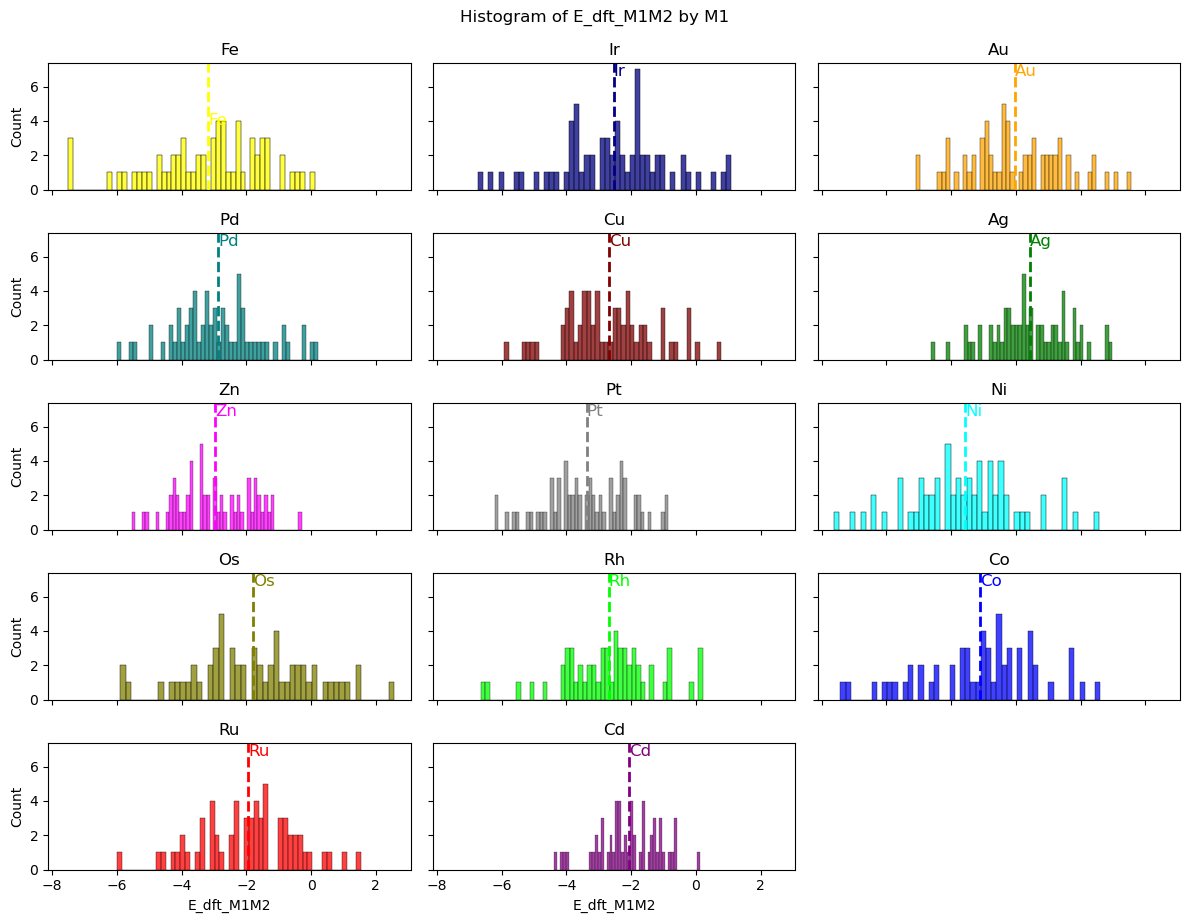

In [21]:
plot_energy_histograms_by_metal(
    df=Edft_balanced_df,
    metal_col='M1',
    energy_col='E_dft_M1M2',
    color_map=metal_colors,
    save_dir='../../../data/figures/sacs_eda',
    file_name='hist_metal_Edft_balanced'
)